In [15]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
path = '../data/3- international-tourist-departures-per-1000.csv'

In [3]:
df = pd.read_csv(path)

### Explore the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          2227 non-null   object 
 1   Code                                            2227 non-null   object 
 2   Year                                            2227 non-null   int64  
 3   Outbound departures (tourists) per 1000 people  2227 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 69.7+ KB


In [5]:
df['Outbound departures (tourists) per 1000 people'].describe()

count    2227.000000
mean      403.150795
std       524.003388
min         0.208574
25%        50.456678
50%       182.626170
75%       582.333500
max      4465.042500
Name: Outbound departures (tourists) per 1000 people, dtype: float64

In [14]:
df.head()

,Entity,Code,Year,Outbound departures (tourists) per 1000 people
0,Algeria,DZA,1995,38.275127
1,Algeria,DZA,1996,30.153902
2,Algeria,DZA,1997,28.056696
3,Algeria,DZA,1998,29.373764
4,Algeria,DZA,1999,29.756720


In [15]:
df.tail()

,Entity,Code,Year,Outbound departures (tourists) per 1000 people
2222,Zimbabwe,ZWE,2017,187.647000
2223,Zimbabwe,ZWE,2018,152.004460
2224,Zimbabwe,ZWE,2019,213.291050
2225,Zimbabwe,ZWE,2020,63.370857
2226,Zimbabwe,ZWE,2021,37.327606


In [16]:
# Check missing data
df.isnull().sum()

Entity                                            0
Code                                              0
Year                                              0
Outbound departures (tourists) per 1000 people    0
dtype: int64

In [ ]:
# Check for unique values 
df['Entity'].unique()



array(['Algeria', 'Angola', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Bermuda', 'Bhutan', 'Bolivia', 'Brazil', 'British Virgin Islands',
       'Bulgaria', 'Burundi', 'Cambodia', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Israel', 'Italy', 'Jordan', 'Kazakhstan',
       'Kuwait', 'Kyrgyzstan', 'Latvia', 'Libya', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Moldova', 'Morocco', 'Nepal',
      

In [ ]:
# Average Departures
country_departures = df.groupby('Entity')['Outbound departures (tourists) per 1000 people'].mean().reset_index()

In [ ]:
# Sort the countires based on average departures
sorted_departures = country_departures.sort_values(by='Outbound departures (tourists) per 1000 people', ascending=False)

In [12]:
# Extract top, buttom and middle countries regarding departures

highest_dapartures = sorted_departures.head(10)
lowest_departures = sorted_departures.tail(10)
middle_index = len(sorted_departures) // 2
middle_departures = sorted_departures.iloc[middle_index-5:middle_index+5]

In [14]:
# Visualization
visualization_data = pd.concat([highest_dapartures, middle_departures, lowest_departures])

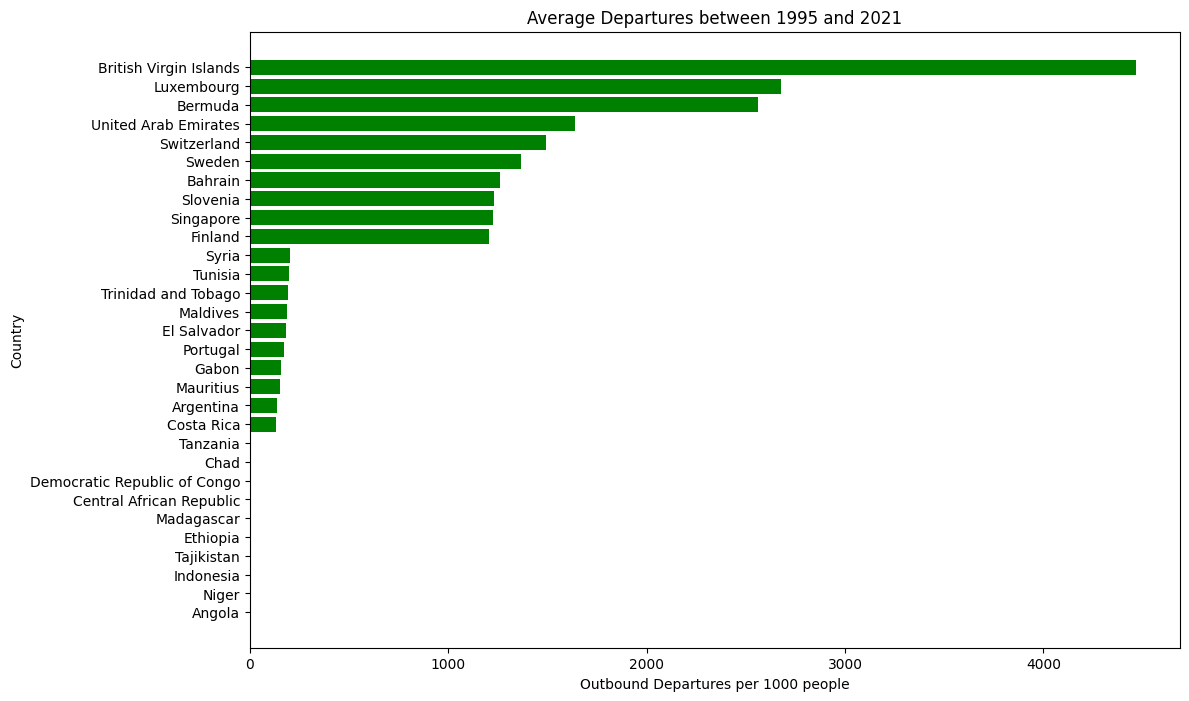

In [17]:
# Plotting

plt.figure(figsize=(12,8))
plt.barh(
    visualization_data['Entity'],
    visualization_data['Outbound departures (tourists) per 1000 people'],
    color='green'
)

plt.xlabel('Outbound Departures per 1000 people')
plt.ylabel('Country')
plt.title('Average Departures between 1995 and 2021')
plt.gca().invert_yaxis()
plt.tight_layout
plt.show()

In [16]:
df['Year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021])

In [27]:
lowest_departures['Entity'].tolist()

['Tanzania',
 'Chad',
 'Democratic Republic of Congo',
 'Central African Republic',
 'Madagascar',
 'Ethiopia',
 'Tajikistan',
 'Indonesia',
 'Niger',
 'Angola']

### Insight

The data reveals a significant disparity in outbound tourism across different countries. While some countries, like the British Virgin Islands and Luxembourg, have extremely high rates of outbound departures, others, such as Angola and Niger, have very low rates. This variance likely reflects factors such as economic development, cultural norms, and geographic location.

**Summary**
- The average number of outbound departures (tourists) per 1,000 people across all countries is 403.15.
- There is a significant standard deviation of 524, indicating a large variation in outbound departures between countries.
- The top 10 countries with the highest average outbound departures are:
    - British Virgin Islands
    - Luxembourg
    - Bermuda
    - United Arab Emirates
    - Switzerland
    - Sweden
    - Bahrain
    - Slovenia
    - Singapore
    - Finland
- The bottom 10 countries with the lowest average outbound departures are:
    - Tanzania
    - Chad
    - Democratic Republic of Congo
    - Central African Republic
    - Madagascar
    - Ethiopia
    - Tajikistan
    - Indonesia
    - Niger
    - Angola

### Time Series Analysis for Outbound Departure

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
data = pd.read_csv(path, index_col='Year')

In [43]:
data[data['Entity'] == 'Iran']

,Entity,Code,Outbound departures (tourists) per 1000 people
Year,,,
1995,Iran,IRN,16.448772
1996,Iran,IRN,19.773247
1997,Iran,IRN,22.935146
1998,Iran,IRN,26.630350
1999,Iran,IRN,28.786465
2000,Iran,IRN,34.877132
2001,Iran,IRN,35.995580
2002,Iran,IRN,43.385193
2021,Iran,IRN,27.319225


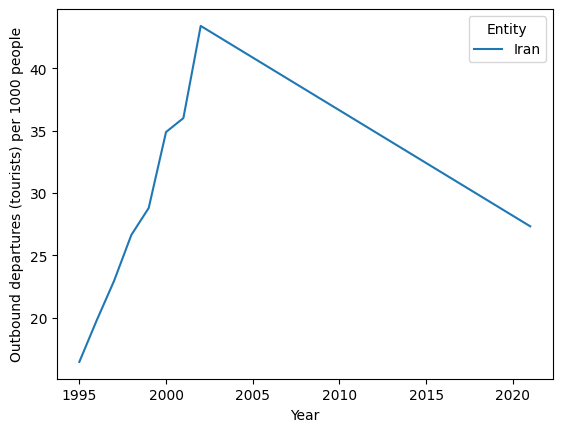

In [49]:
# Visualize Time Series of a Region
countries = ['Iran']
visualize_data = data[data['Entity'].isin(countries)]

sns.lineplot(x='Year', y='Outbound departures (tourists) per 1000 people', hue='Entity', data=visualize_data)
plt.show()

In [48]:
visualize_data

,Entity,Code,Outbound departures (tourists) per 1000 people
Year,,,
2000,Armenia,ARM,35.032074
2001,Armenia,ARM,35.108570
2002,Armenia,ARM,42.189472
2003,Armenia,ARM,54.797062
2004,Armenia,ARM,72.086815
...,...,...,...
1999,Iran,IRN,28.786465
2000,Iran,IRN,34.877132
2001,Iran,IRN,35.995580
